In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv(r"/content/Super Market Sales.csv")

In [4]:
df.head

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.shape

(1000, 17)

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


EXPLORATORY DATA ANALYSIS


Gender Count Plot:


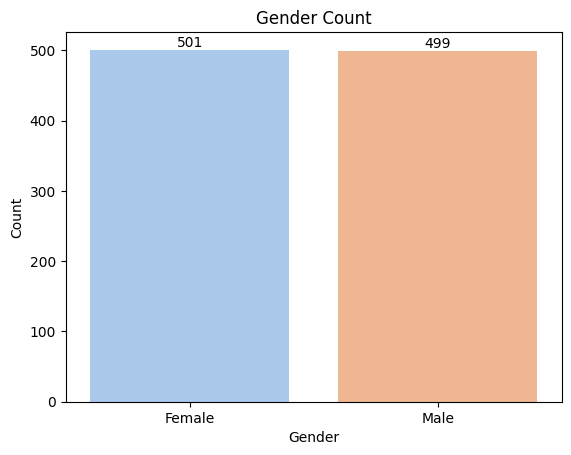

In [12]:
print("\nGender Count Plot:")
plt.figure()
ax = sns.countplot(x="Gender", data=df, palette="pastel")
ax.set_title("Gender Count")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()



Branch vs Rating Boxplot:


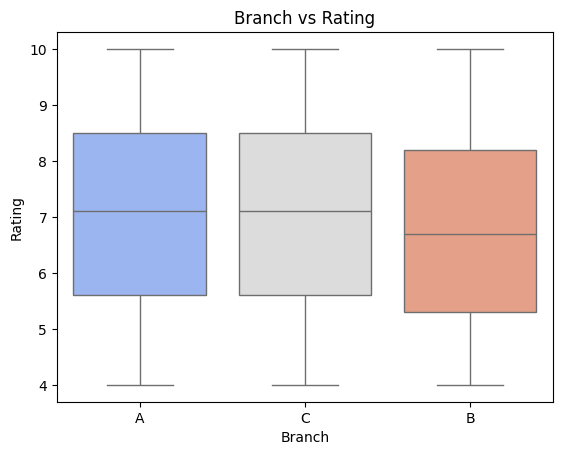

In [15]:
# Branch vs Rating Boxplot
print("\nBranch vs Rating Boxplot:")
plt.figure()
ax = sns.boxplot(x="Branch", y="Rating", data=df, palette="coolwarm")
ax.set_title("Branch vs Rating")
ax.set_xlabel("Branch")
ax.set_ylabel("Rating")
plt.show()



Product Line Count Plot:


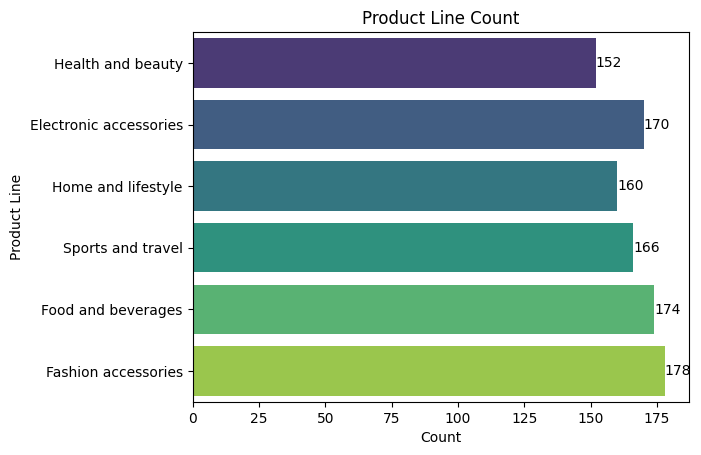

In [16]:
# Product Line Count Plot
print("\nProduct Line Count Plot:")
plt.figure()
ax = sns.countplot(y="Product line", data=df, palette="viridis")
ax.set_title("Product Line Count")
ax.set_xlabel("Count")
ax.set_ylabel("Product Line")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()


Correlations between numericals columns

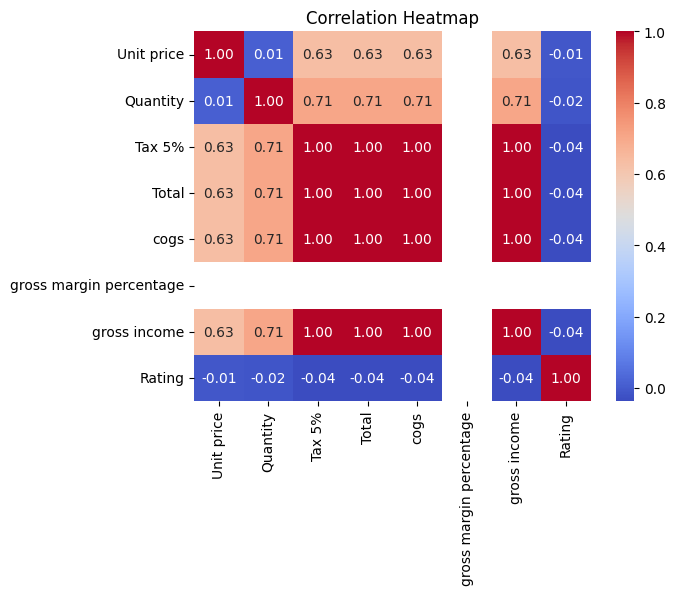

In [17]:
# Correlation heatmap for numerical columns
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
correlation = df[numerical_columns].corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

COUNTPLOT DISTRIBUTION FOR CATEGORICAL COLUMNS

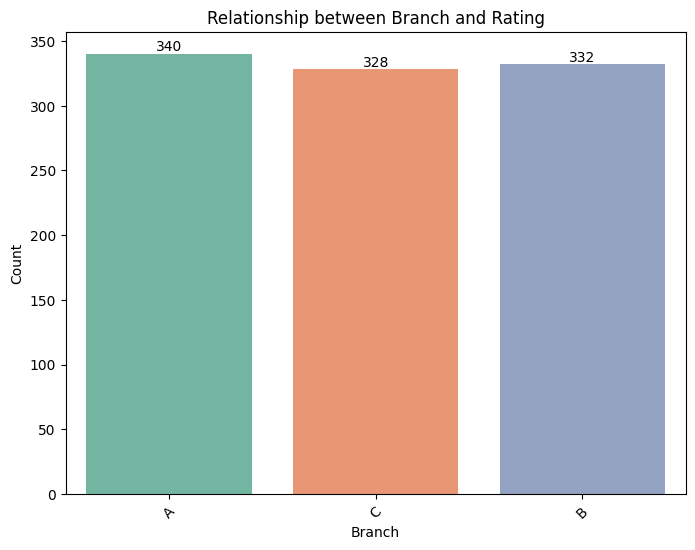

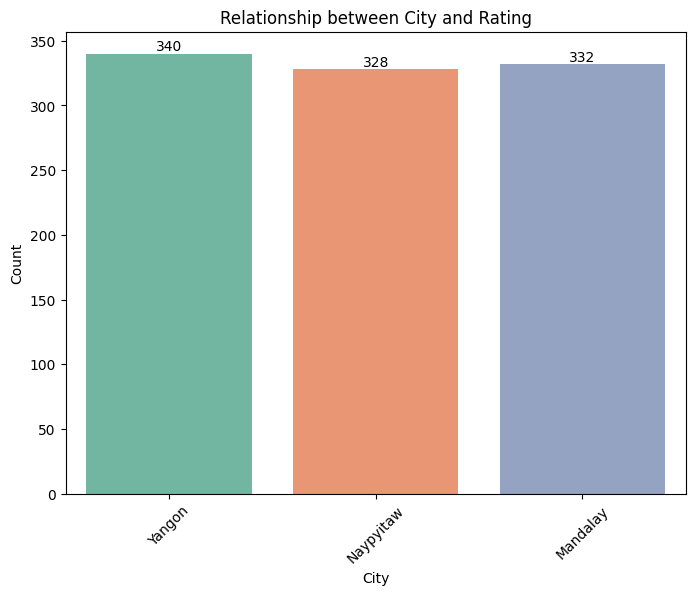

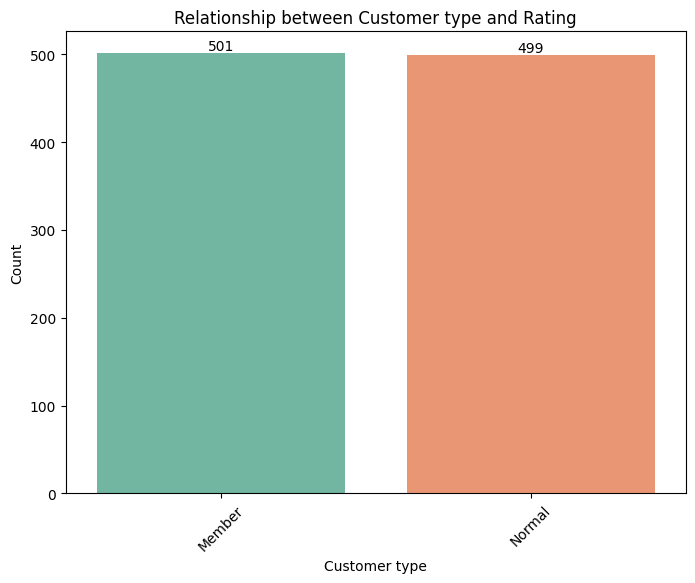

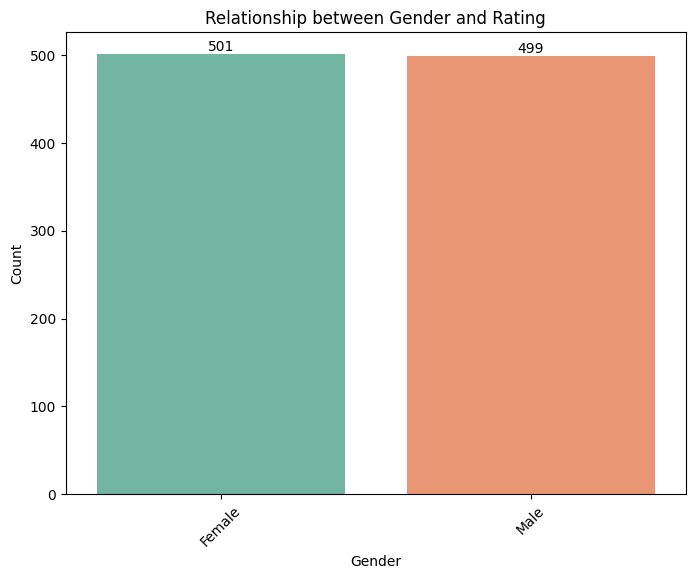

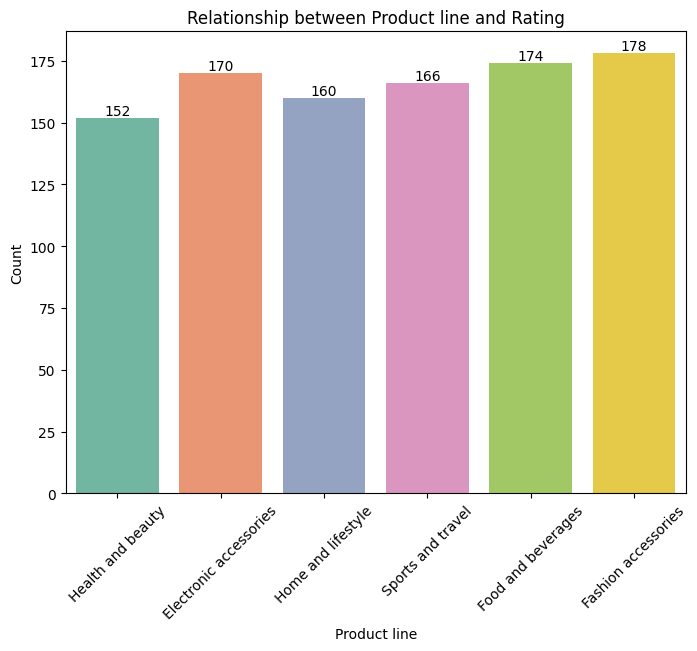

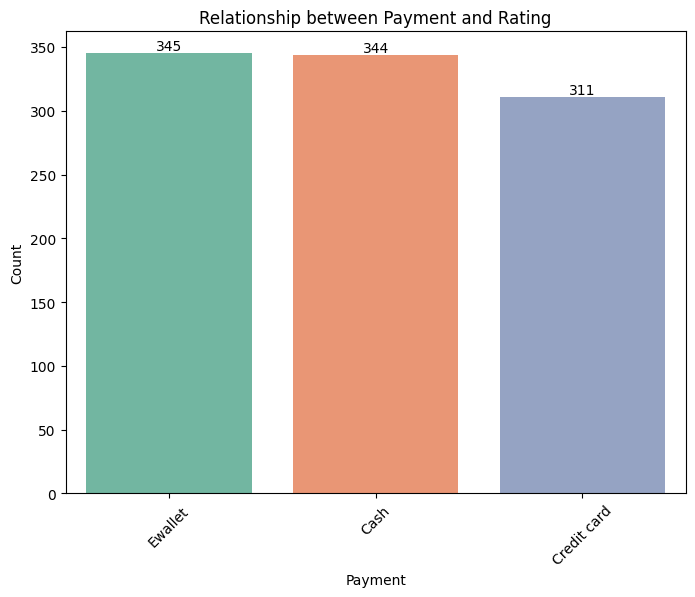

In [20]:
# Categorical Columns Count Plots
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=df, x=col, palette="Set2")
    ax.set_title(f'Relationship between {col} and Rating')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
    plt.show()


Boxplot for rating vs categorical variables

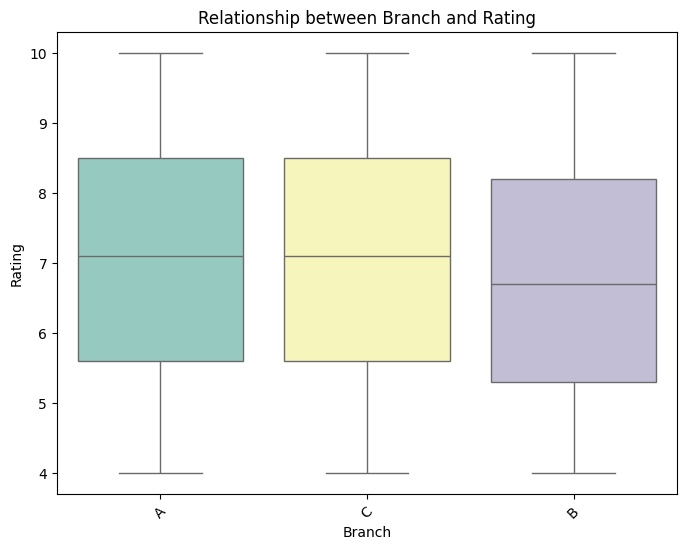

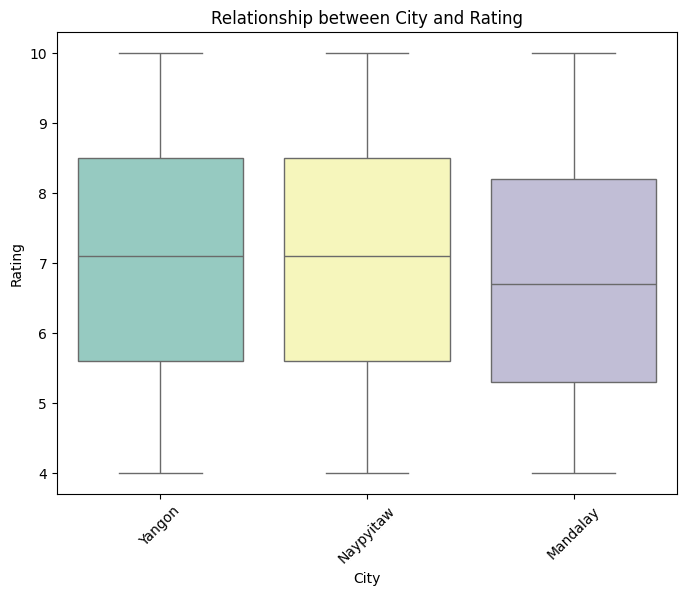

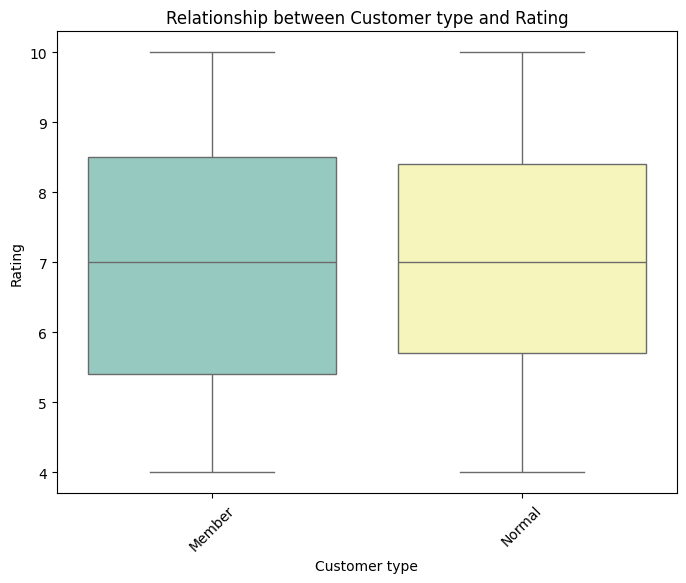

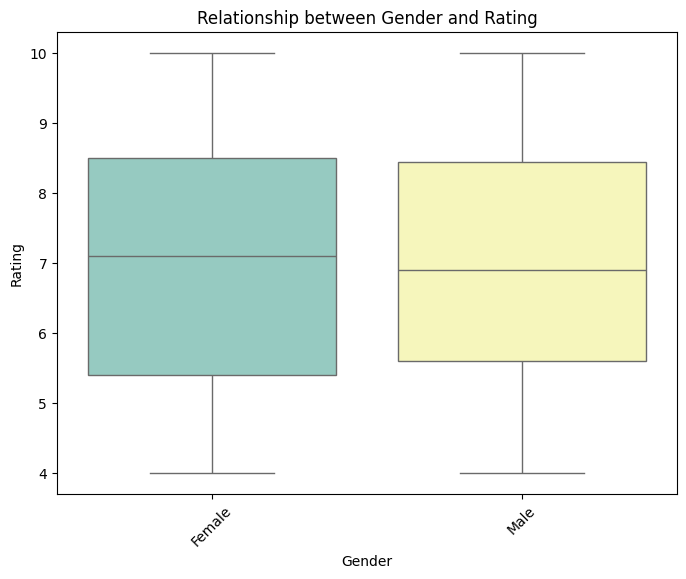

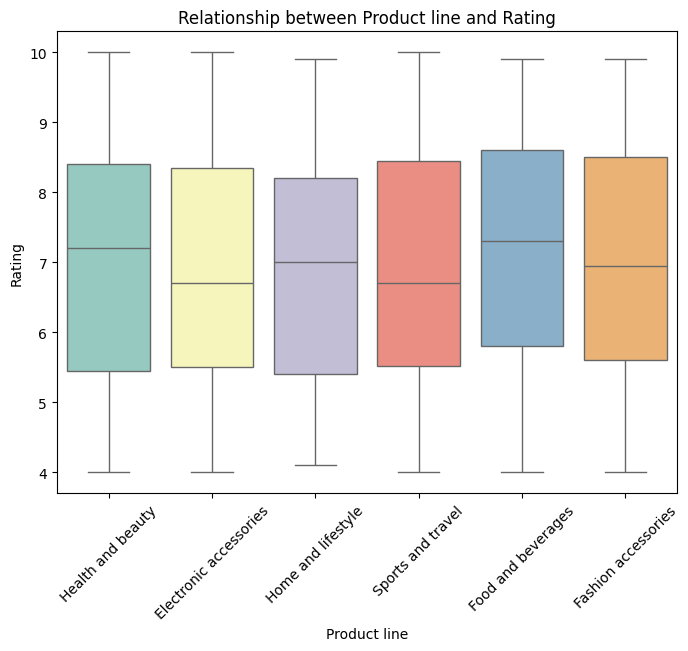

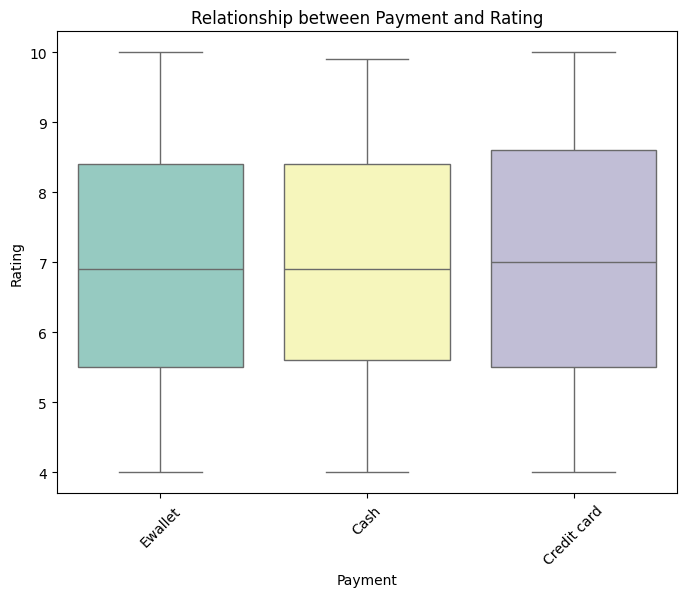

In [23]:
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(data=df, x=col, y='Rating', palette="Set3")
    ax.set_title(f'Relationship between {col} and Rating')
    ax.set_xlabel(col)
    ax.set_ylabel('Rating')
    plt.xticks(rotation=45)
    plt.show()


Scatterplot for Rating vs Numerical Variables

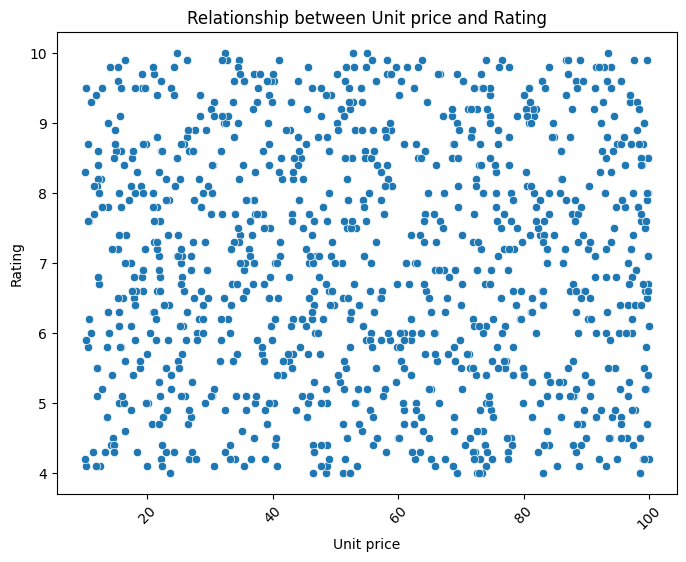

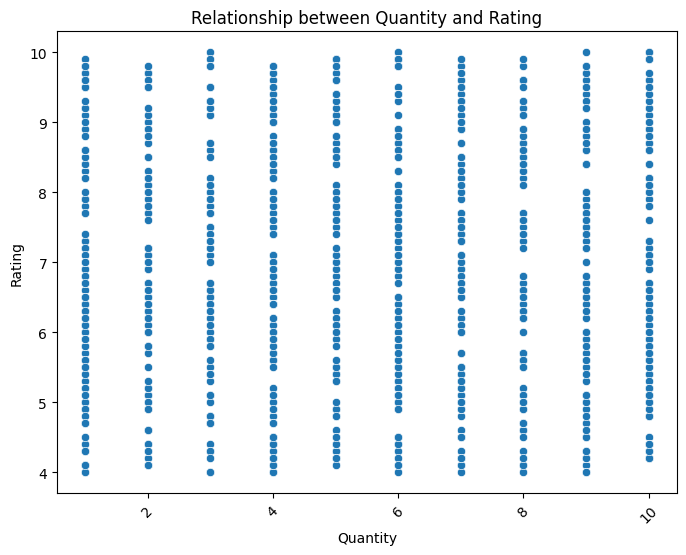

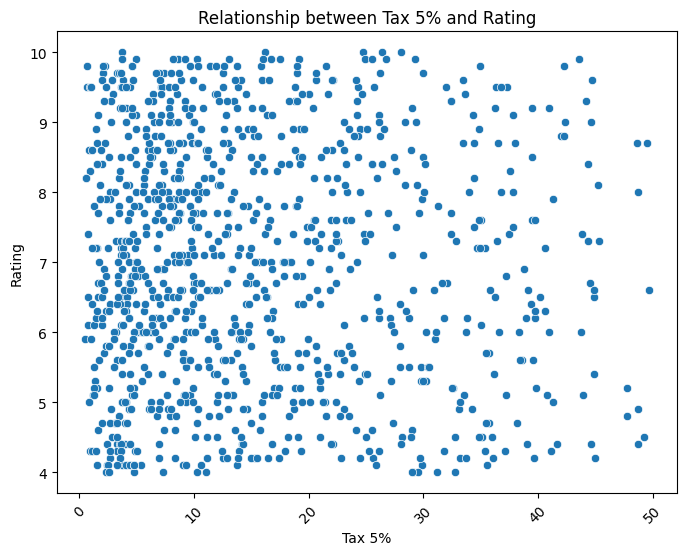

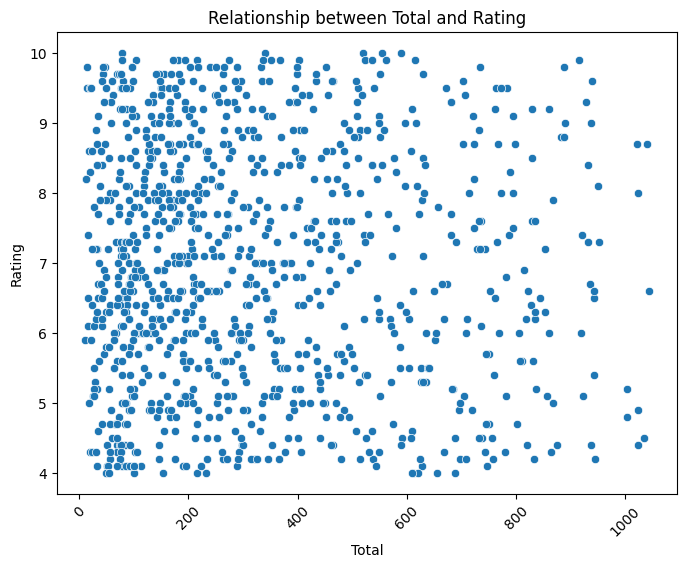

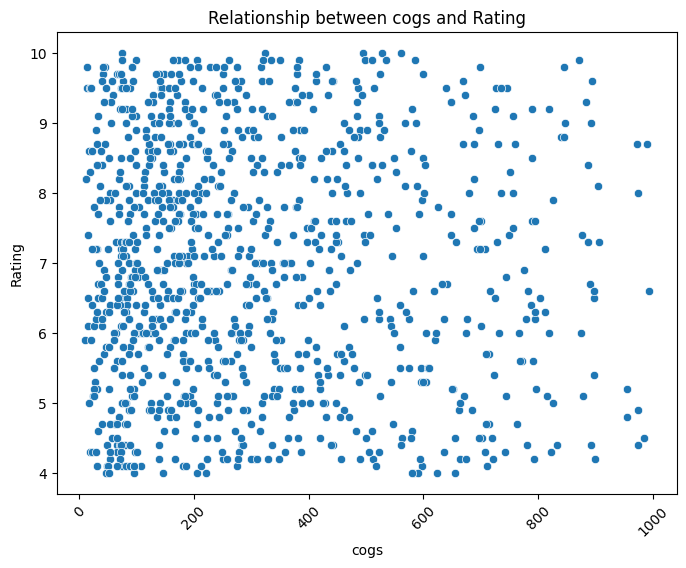

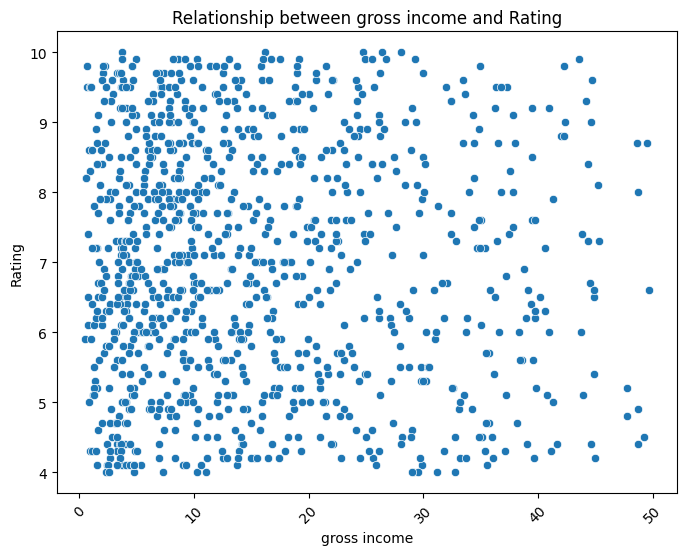

In [24]:
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Rating')
    plt.title(f'Relationship between {col} and Rating')
    plt.xticks(rotation=45)
    plt.show()

Histplot for every column

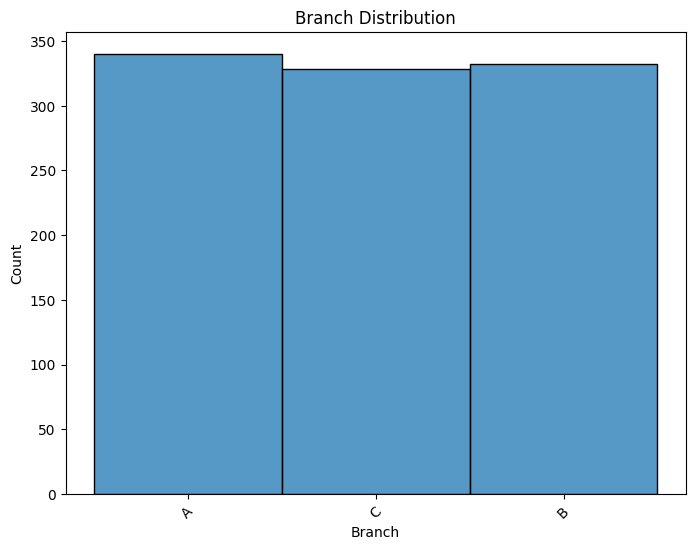

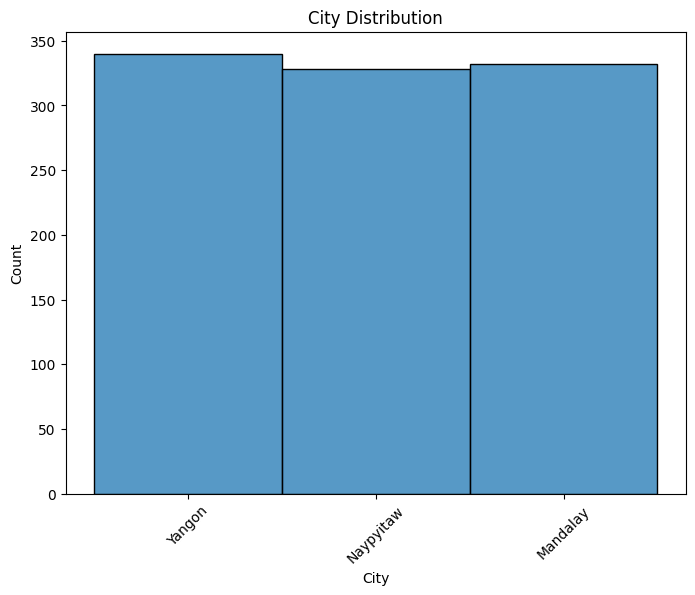

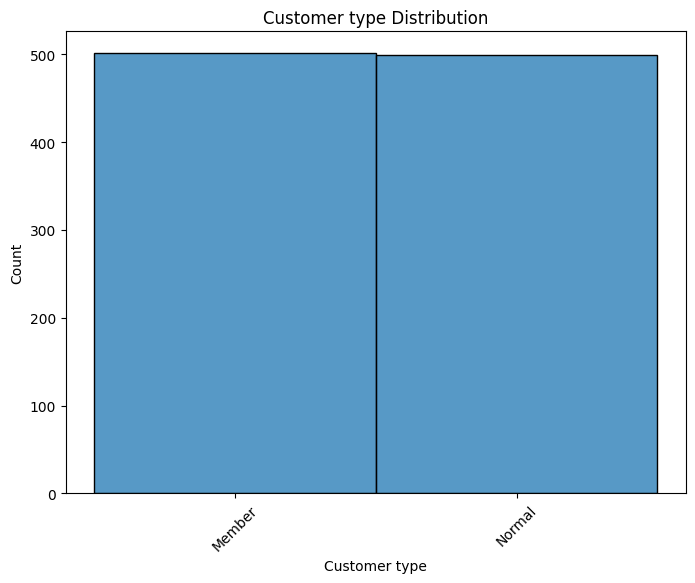

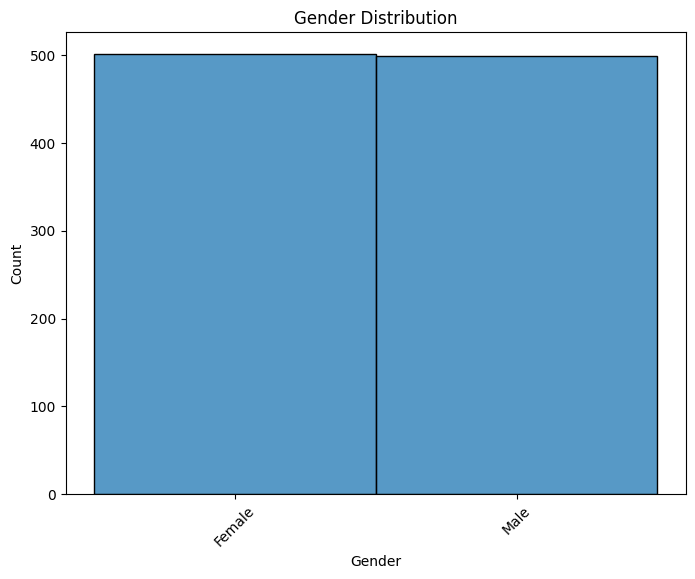

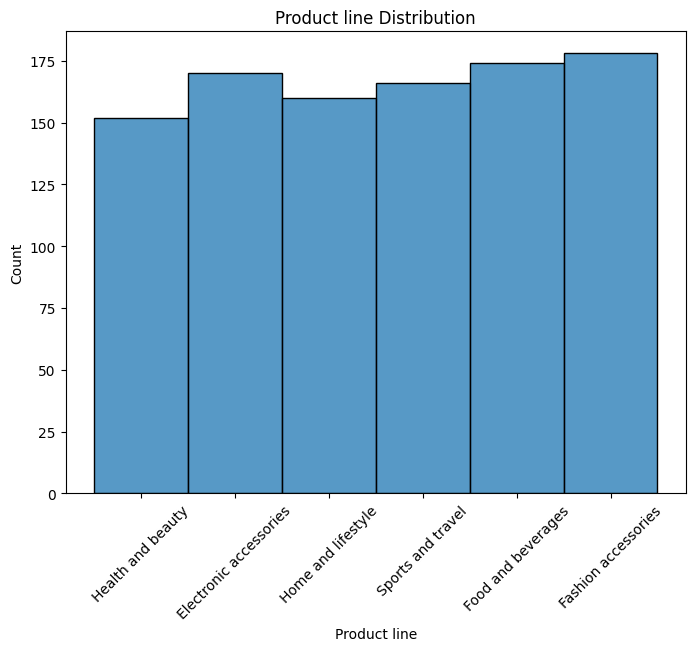

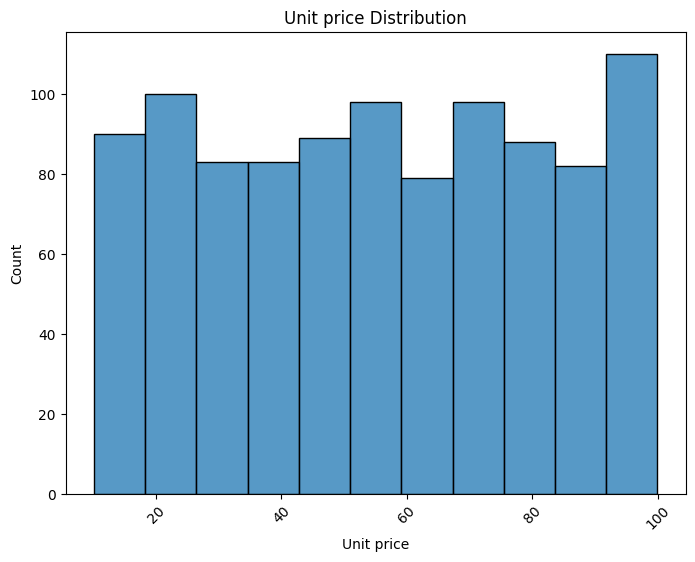

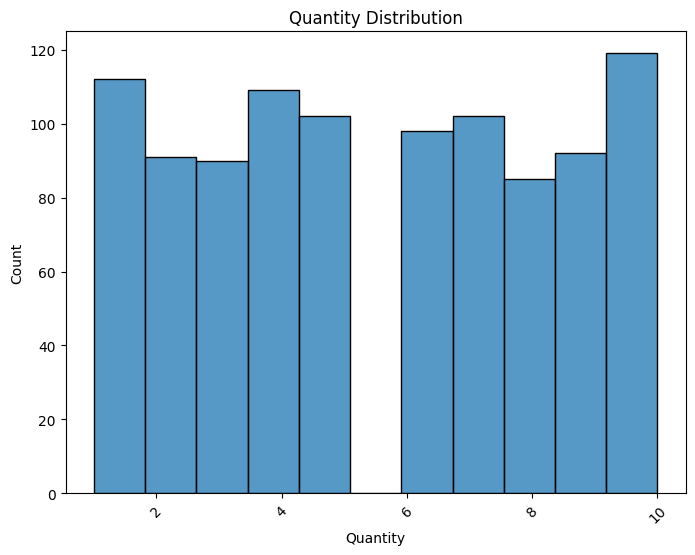

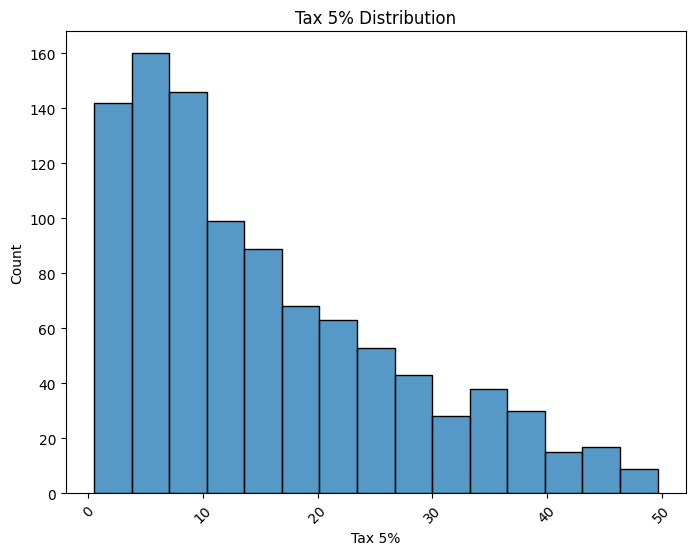

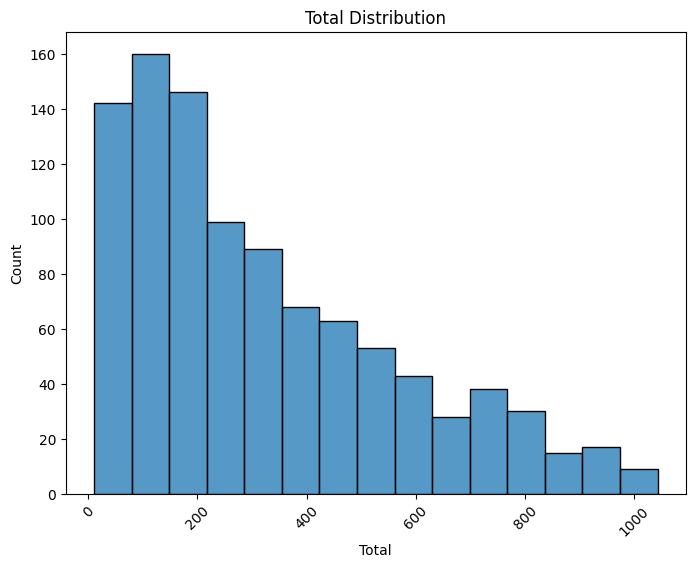

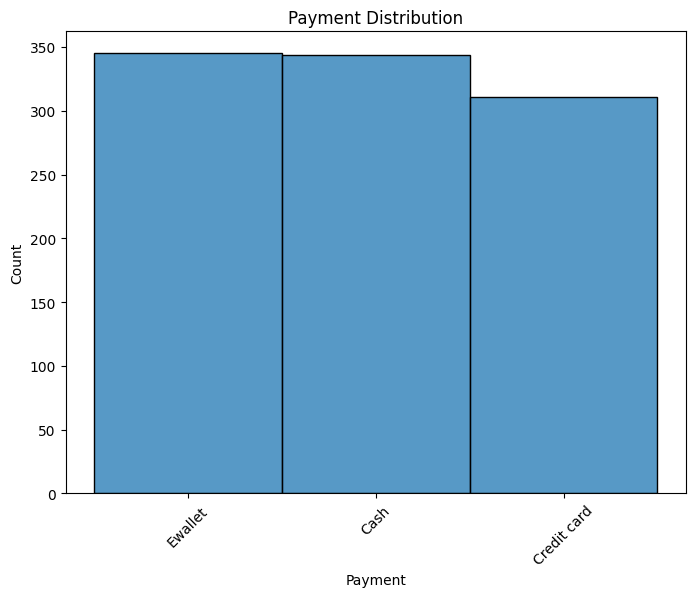

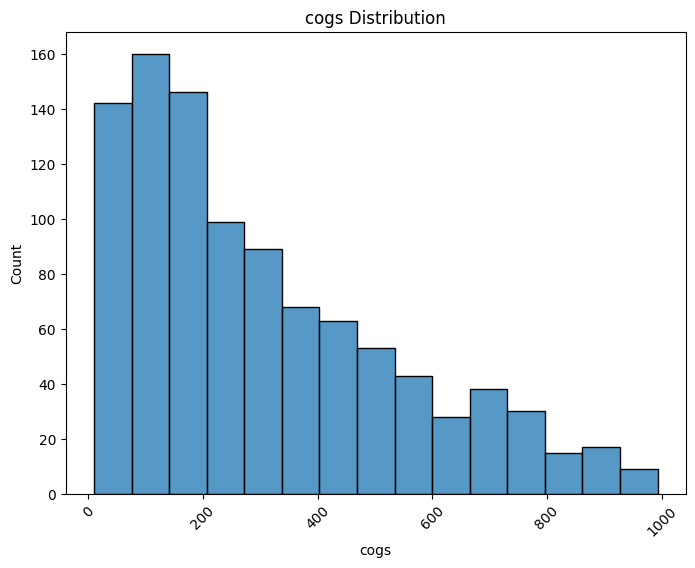

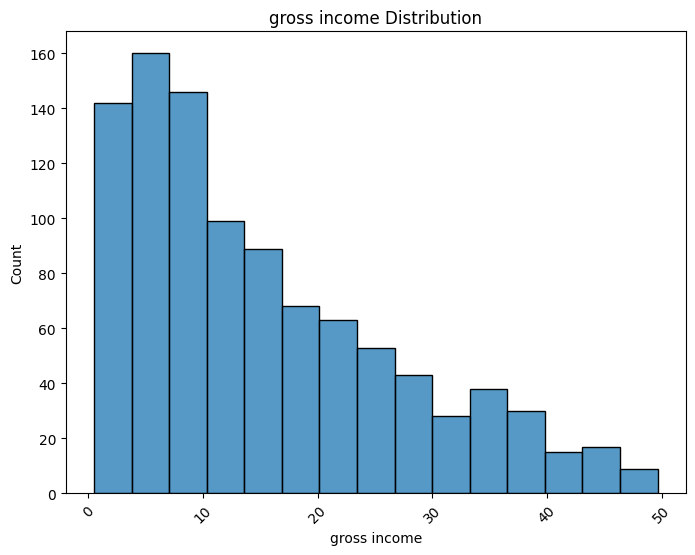

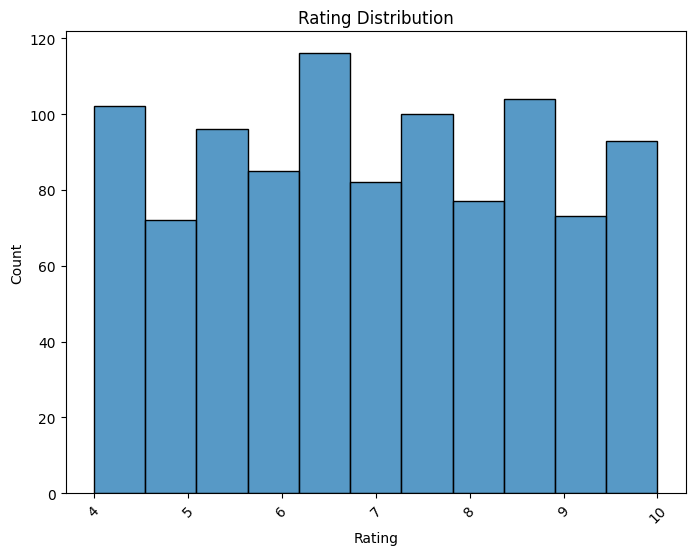

In [26]:
columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line',
           'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
           'gross income', 'Rating']
columns = df[columns]
for col in columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col,palette="spring")
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

Log transforming skewed columns

In [27]:
# List of columns to apply log transformation to
columns_to_transform = ['Tax 5%', 'Total', 'cogs', 'gross income']

# Apply log transformation to each column
for col in columns_to_transform:
    df[col] = np.log(df[col] + 1)  # Add 1 to avoid log(0)

Data Distribution after Log Transfoming

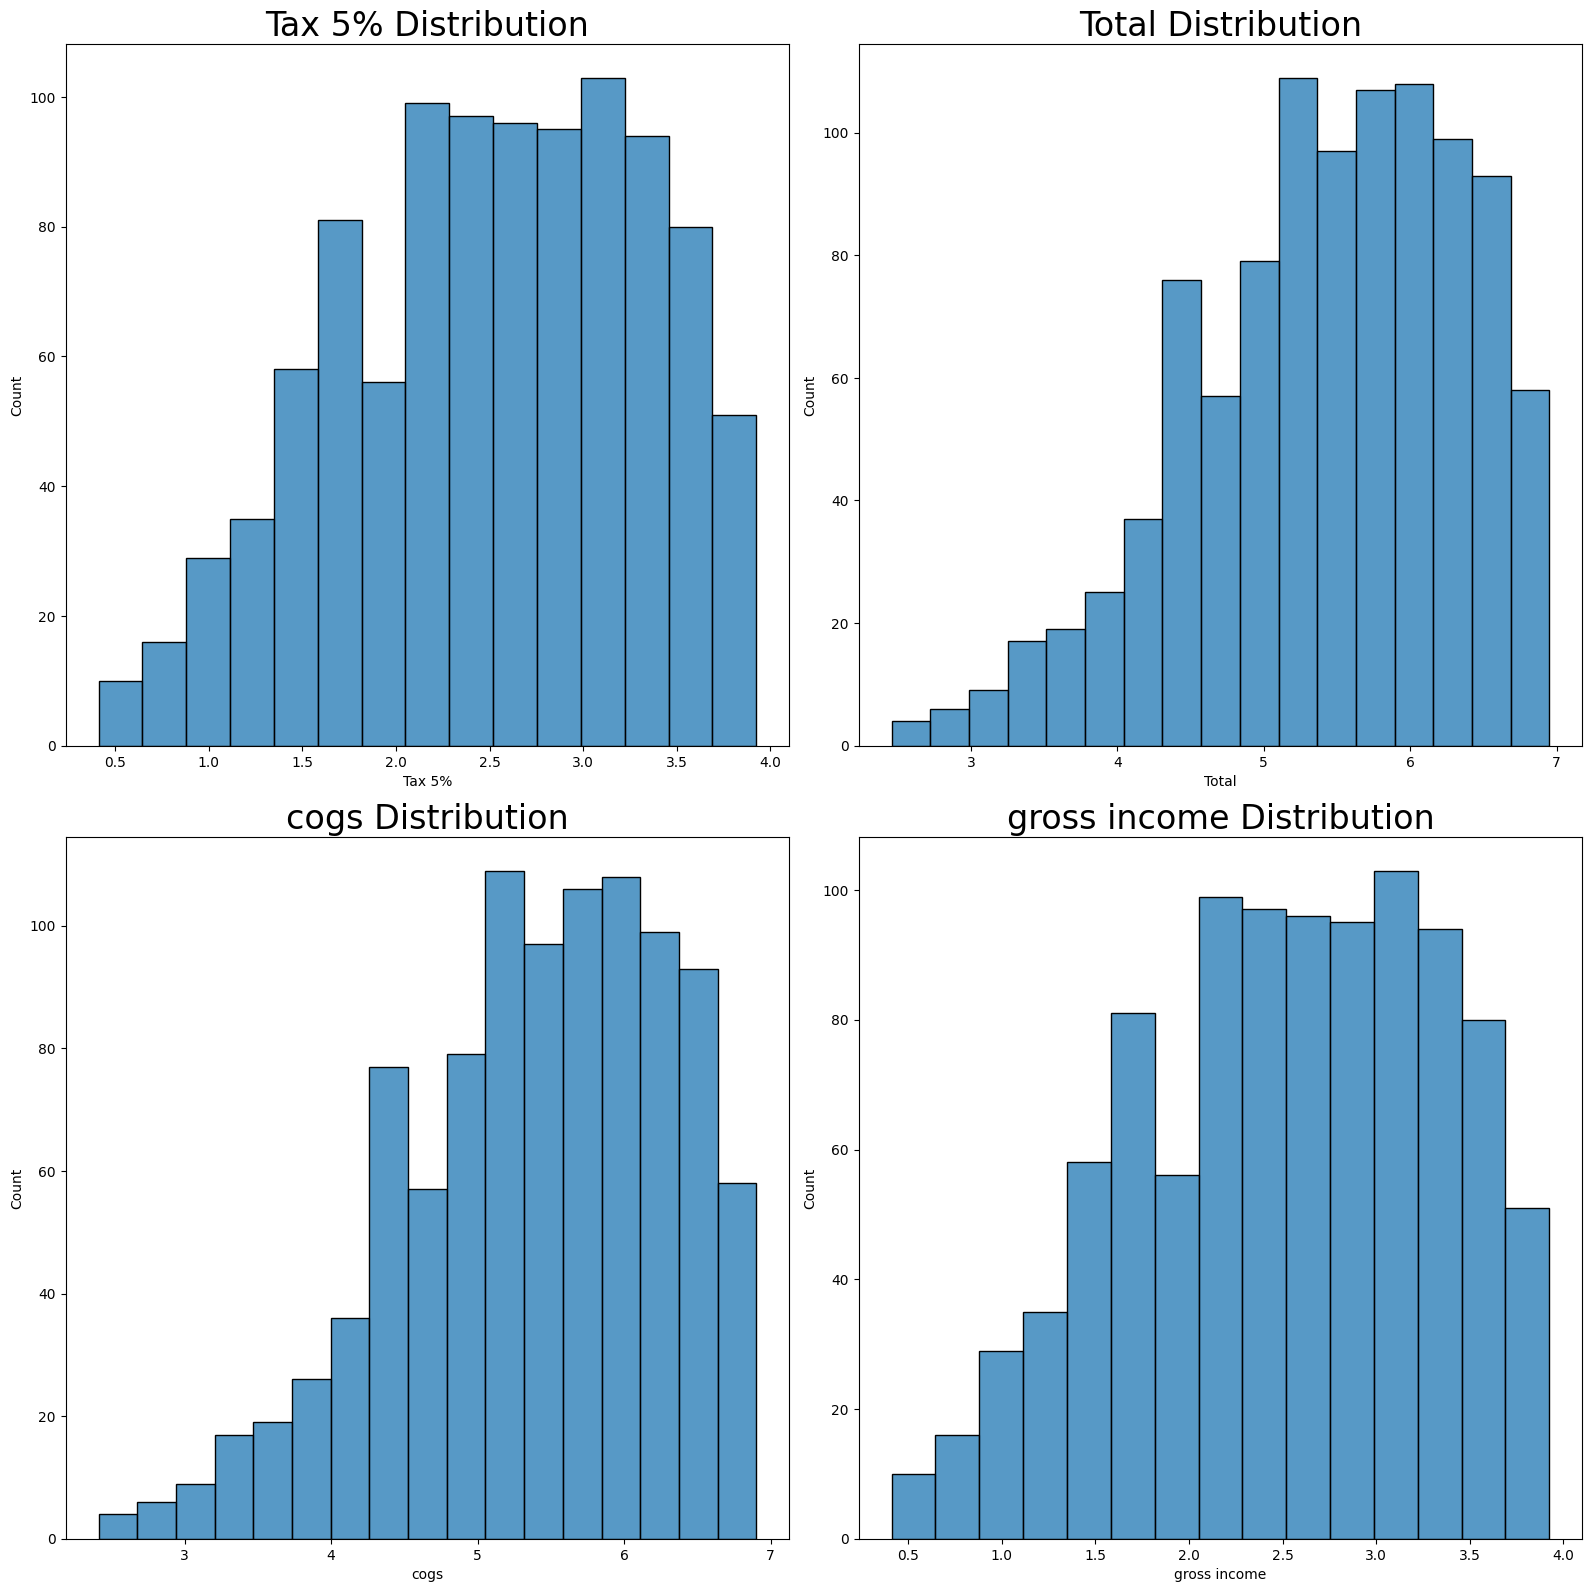

In [28]:
# List of columns to plot
columns = ['Tax 5%', 'Total', 'cogs', 'gross income']
# Create a figure and axes for plotting with a larger size
plt.figure(figsize=(16, 16))  # Adjust this as necessary for even larger plots

# Loop through the columns and create histograms
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 4 rows, 4 columns grid (16 slots)
    sns.histplot(data=df, x=col)
    plt.title(f'{col} Distribution', fontsize=24)  # Increase title font size

# Adjust layout for better spacing between plots
plt.tight_layout(pad=1.0)  # Increase padding between subplots
plt.show()

Dropping Columns

In [29]:
df= df.drop(columns=['Invoice ID','Date','Time','gross margin percentage','Total'])

One hot encoding

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,3.301064,6.261167,3.301064,9.1,False,False,False,True,False,False,False,False,True,False,False,False,True
1,15.28,5,1.572774,4.348987,1.572774,9.6,False,True,True,False,True,False,False,False,False,False,False,False,False
2,46.33,7,2.845810,5.784779,2.845810,7.4,False,False,False,True,True,True,False,False,False,True,False,True,False
3,58.22,8,3.189982,6.145815,3.189982,8.4,False,False,False,True,False,True,False,False,True,False,False,False,True
4,86.31,7,3.440690,6.405509,3.440690,5.3,False,False,False,True,True,True,False,False,False,False,True,False,True


Standardization

In [31]:
X = df_encoded.drop(columns=['Rating'])
y = df_encoded['Rating']

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Implementing Linear Regression


QQ Plot:


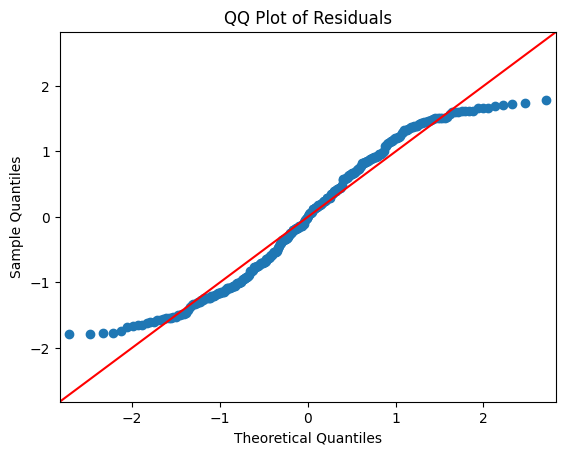

In [40]:
import statsmodels.api as sm
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# QQ Plot
print("\nQQ Plot:")
sm.qqplot(y_pred - y_test, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()


Calculating RMSE

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

3.015678655638603
1.7365709474820206


Preprocessing Encoding Categori

In [44]:
le = LabelEncoder()
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

Select features and target
Assuming 'Customer type' is the target column (binary classification: Member vs Normal)

In [46]:
X = df.drop('Customer type', axis=1)
y = df['Customer type']


Train-test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Model

In [48]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [49]:
# Predictions
y_pred = model.predict(X_test)

In [50]:
# Evaluation Metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[52 45]
 [56 47]]


In [51]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.54      0.51        97
           1       0.51      0.46      0.48       103

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.49       200



In [52]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Accuracy Score:
0.495


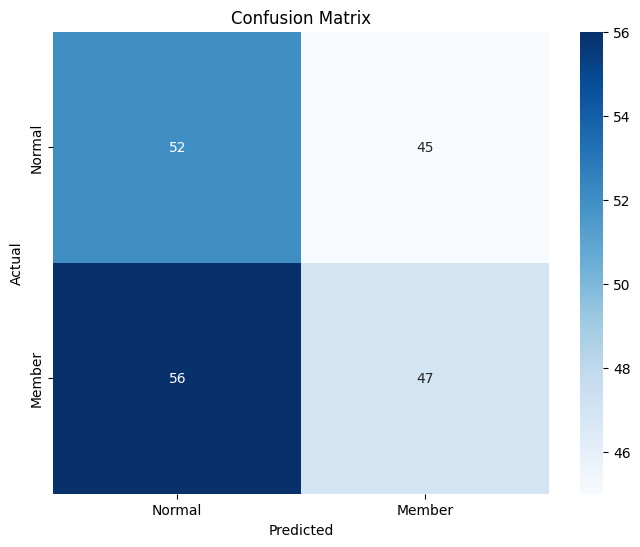

In [53]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Member'], yticklabels=['Normal', 'Member'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Predictions
dt_y_pred = dt_model.predict(X_test)

In [58]:
# Evaluation Metrics
print("\nConfusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, dt_y_pred))


Confusion Matrix (Decision Tree):
[[58 39]
 [51 52]]


In [59]:
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, dt_y_pred))


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        97
           1       0.57      0.50      0.54       103

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [60]:
print("\nAccuracy Score (Decision Tree):")
print(accuracy_score(y_test, dt_y_pred))


Accuracy Score (Decision Tree):
0.55


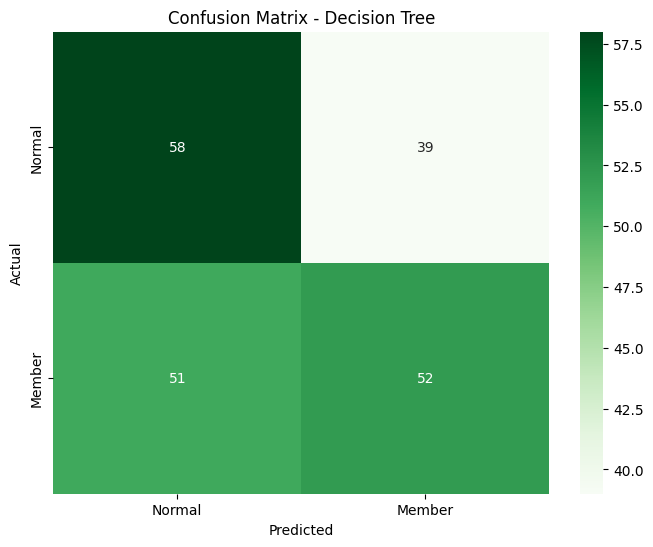

In [61]:
# Visualization: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Member'], yticklabels=['Normal', 'Member'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


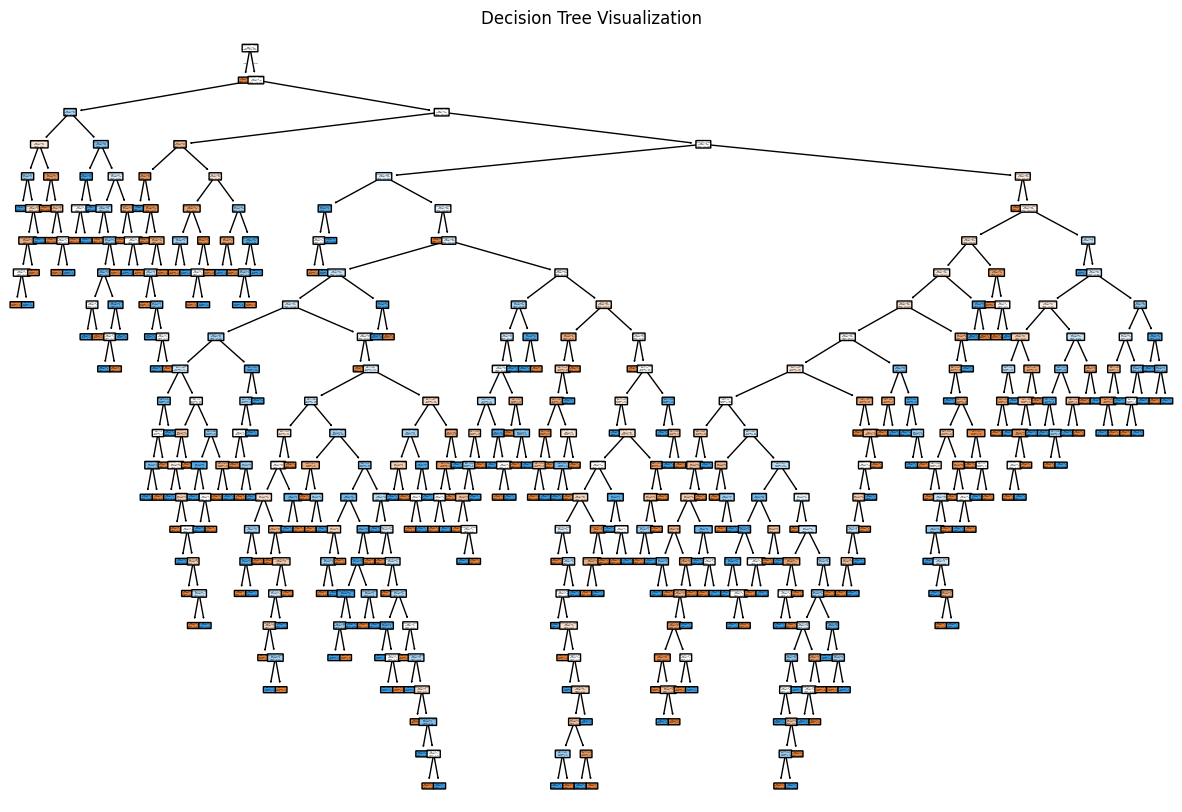

In [62]:
# Plot Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Normal', 'Member'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Random forest

In [64]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Predictions for Random Forest
rf_y_pred = rf_model.predict(X_test)

In [66]:
# Evaluation Metrics for Random Forest
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf_y_pred))


Confusion Matrix (Random Forest):
[[57 40]
 [66 37]]


In [67]:
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf_y_pred))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.46      0.59      0.52        97
           1       0.48      0.36      0.41       103

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.46       200
weighted avg       0.47      0.47      0.46       200



In [69]:
print("\nAccuracy Score (Random Forest):")
print(accuracy_score(y_test, rf_y_pred))


Accuracy Score (Random Forest):
0.47


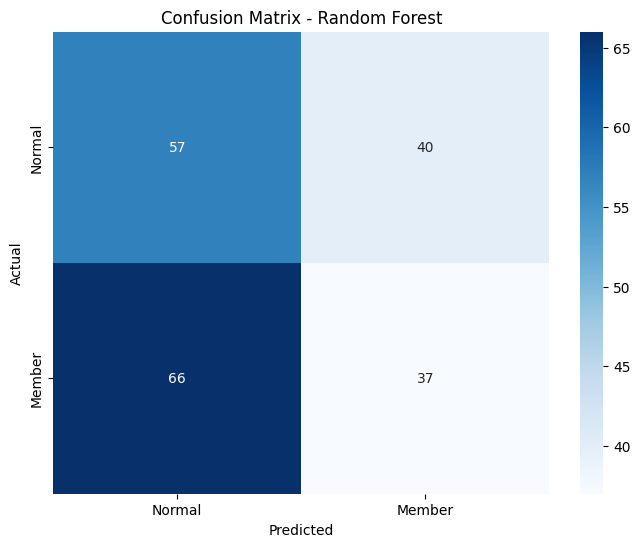

In [70]:
# Visualization: Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Member'], yticklabels=['Normal', 'Member'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()